In [1]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
img = Image.open("ironman.jpg")

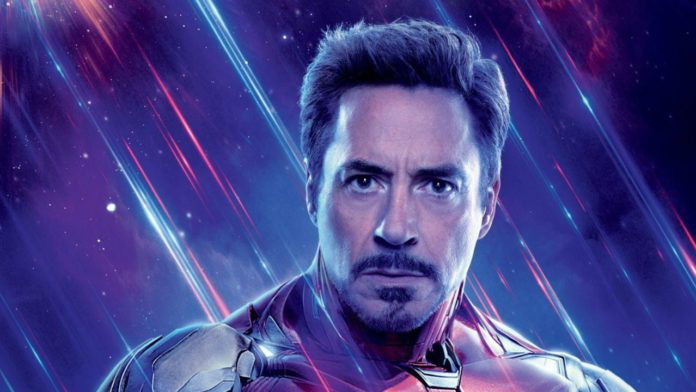

In [4]:
img

In [5]:
#loading image using keras
from tensorflow.keras.preprocessing.image import load_img

In [6]:
img = load_img("ironman.jpg",target_size=(100,100))

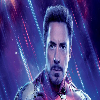

In [7]:
img

In [8]:
arr = np.array(img)

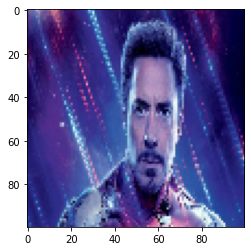

In [9]:
plt.imshow(arr)

In [10]:
twod = arr.mean(axis=2)

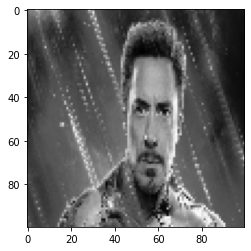

In [11]:
plt.imshow(twod,cmap="gray")

In [12]:
flat = twod.flatten()/255

In [13]:
flat.shape

(10000,)

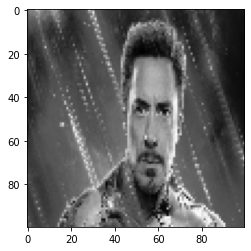

In [14]:
plt.imshow(flat.reshape(twod.shape),cmap='gray')

In [15]:
arr.shape

(100, 100, 3)

In [16]:
population =np.random.randn(1000,*flat.shape)

In [17]:
population.shape

(1000, 10000)

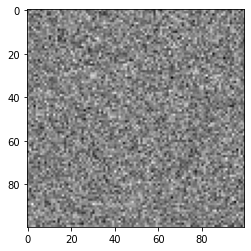

In [18]:
plt.imshow(population[100].reshape(twod.shape),cmap='gray')

In [19]:
flat.min(),flat.max()

(0.00522875816993464, 0.9947712418300653)

In [20]:
from tensorflow.keras.losses import MSE

In [21]:
errors = MSE(flat,population)

In [24]:
fit_idx = np.argsort(errors)[:10] # provides the value with the corrseponding index

In [25]:
fit_idx

array([857, 653, 838, 524, 542,  61, 682, 585, 276, 625], dtype=int64)

In [26]:
fit = population[fit_idx]

In [27]:
fit.shape

(10, 10000)

In [30]:
first = fit[np.random.randint(0,10,1000)]
second = fit[np.random.randint(0,10,1000)]

In [31]:
first.shape

(1000, 10000)

In [32]:
 second.shape

(1000, 10000)

In [33]:
first_sel = np.random.randint(0,2,first.shape)

In [35]:
#second_sel = np.random.randint(0,2,second.shape)

In [34]:
first_sel

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 0, 1]])

In [36]:
# now we want that the first_sel and second_sel whihc are representing which featuures are comming from which selector, to be unique so that one featuure migght not come from both or may not be taken at all
# to solve this, we have modified the way we take second
second_sel = 1- first_sel

In [37]:
population = first*first_sel + second*second_sel # generate algorithm without mutation(therfore practically the same dataset)


In [40]:
# we genreate a mutation also
population = population + np.random.randn(*population.shape) *.0001